# EDA San Francisco Crime Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
data = pd.read_csv('./data/sf_crime/train.csv')
categorycal_cols = ['Category', 'Descript', 'DayOfWeek', 'PdDistrict', 'Resolution', 'Address']
for category in categorycal_cols:
    data[category] = data[category].astype('category')
data['Dates'] = pd.to_datetime(data['Dates']) # format=

data.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


In [4]:
data.count()

Dates         878049
Category      878049
Descript      878049
DayOfWeek     878049
PdDistrict    878049
Resolution    878049
Address       878049
X             878049
Y             878049
dtype: int64

Похоже что NA значения в данных отсутствуют.

In [5]:
# Выберем из данных координаты и категории для дальнейших построений
X = data[['Category', 'X', 'Y']]
x_coords, y_coords, category = data['X'].copy(), data['Y'].copy(), data['Category']

# Для наглядности
x_coords += 122.
y_coords -= 37
group1 = (y_coords < 50)
group2 = (y_coords > 50)

ind = 0
category_index = {}
for item in category.unique():
    if item not in category_index:
        category_index[item] = ind
        ind += 1
        
category_colors = category.apply(lambda item: category_index[item])

D:\soft\dev\anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


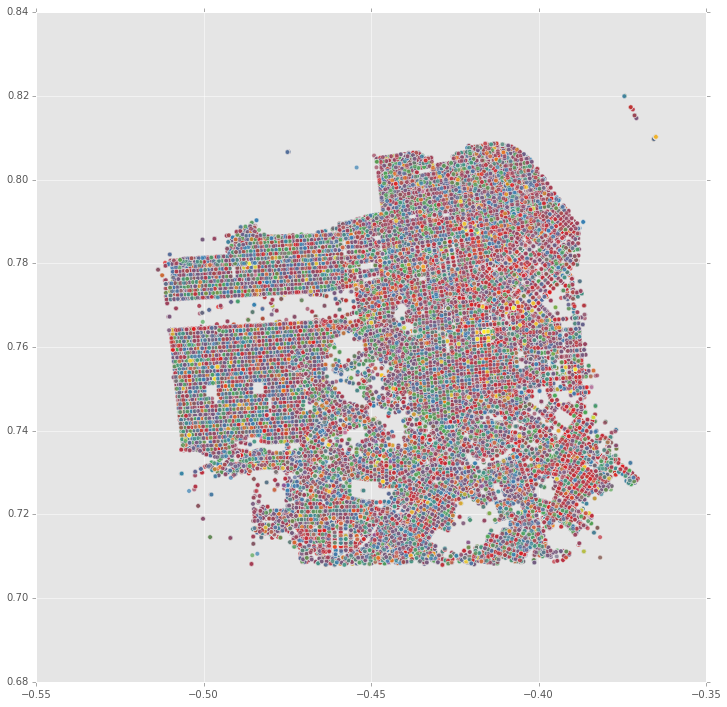

In [6]:
plt.figure(figsize=(12, 12))
plt.scatter(x_coords[group1], y_coords[group1], c=category_colors[group1], cmap='Set1', alpha=0.7)
plt.show()

Многие группы преступлений локализованы, возможно имеет смысл собирать кластеры.
Как вариант можно попробовать SVM c rbf kernel.

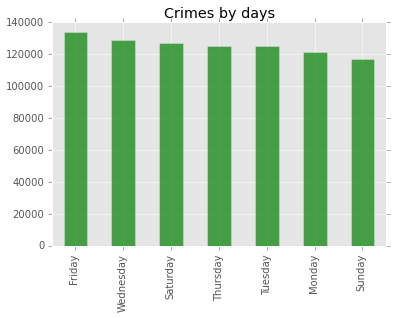

In [7]:
data['DayOfWeek'].value_counts().plot(kind='bar', title='Crimes by days', color='green', alpha=0.7)
plt.show()

Больше всего преступлений совершалось в *пятницу*, меньше всего в *субботу*.

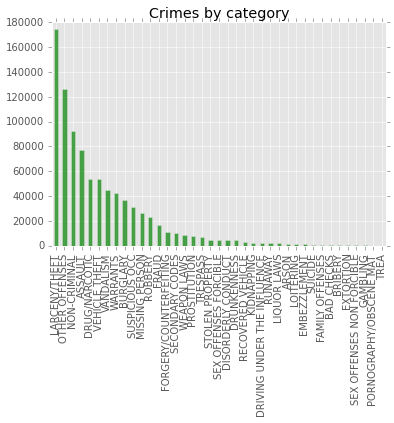

In [8]:
data['Category'].value_counts().plot(kind='bar', title='Crimes by category', color='green', alpha=0.7)
plt.show()

Примерно 1/5 часть типов преступлений совершается незначительное количество раз. Возможно их стоит выкинуть из рассмотрения.

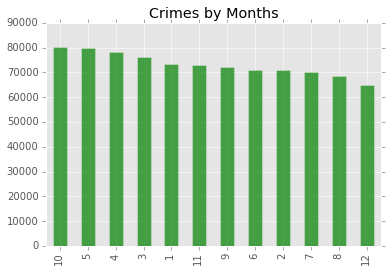

In [3]:
data['Dates'].apply(lambda i: i.month).value_counts().plot(kind='bar', title='Crimes by Months', color='green', alpha=0.7)
plt.show()

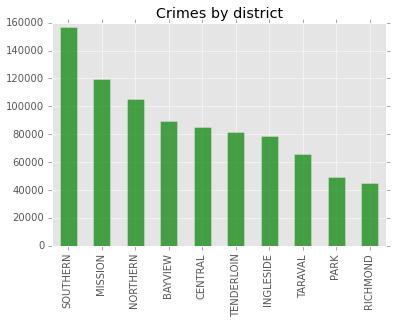

In [6]:
data['PdDistrict'].value_counts().plot(kind='bar', title='Crimes by district', color='green', alpha=0.7)
plt.show()

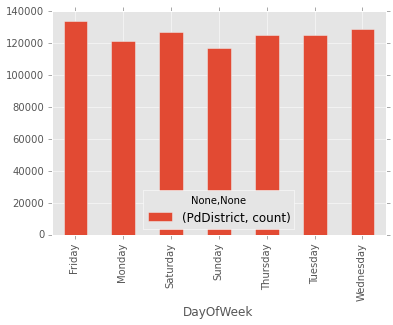

In [63]:
data['DayOfWeek']

d = data[['PdDistrict',  'DayOfWeek']].groupby(['DayOfWeek'])
d.agg(['count']).plot(kind='bar')
plt.show()

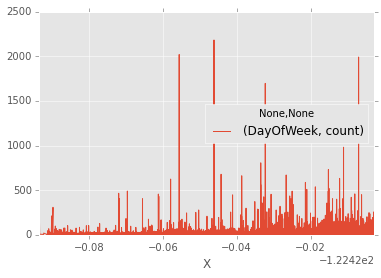

In [112]:
dx = data[['X',  'DayOfWeek']].groupby(['X'])
dx.agg(['count']).head(20000).plot()
plt.show()

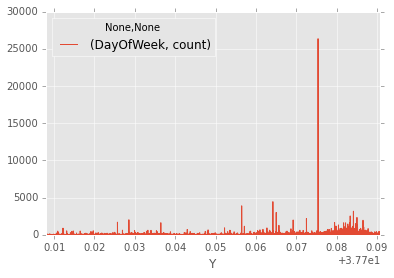

In [186]:
dy = data[['Y',  'DayOfWeek']].groupby(['Y'])
dy.agg(['count']).head(30000).plot()
plt.show()

А вот это уже забавно. Количество преступлений коррелирует с широтой и долготой. Вероятно это связано с тем, что улицы в городе параллельны.

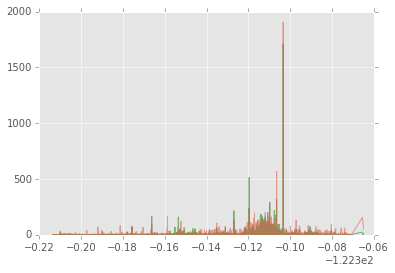

In [185]:
data = data[data['X'] < -120.5]

dx_as = data[data['Category'] == 'WARRANTS'][['X', 'Category']].groupby(['X'])
dx_wa = data[data['Category'] == 'ASSAULT'][['X', 'Category']].groupby(['X'])

dx_as = dx_as.count()
dx_wa = dx_wa.count()

plt.plot(dx_as.index, dx_as.values, alpha=0.5, color='green')
plt.plot(dx_wa.index, dx_wa.values, alpha=0.5)

plt.show()

Похоже на разной долготе разные преступления более популярны.

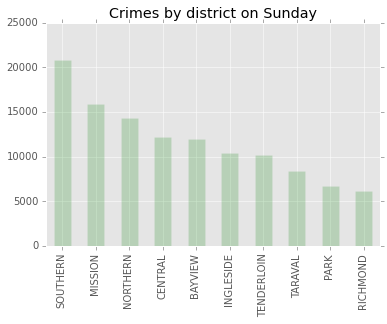

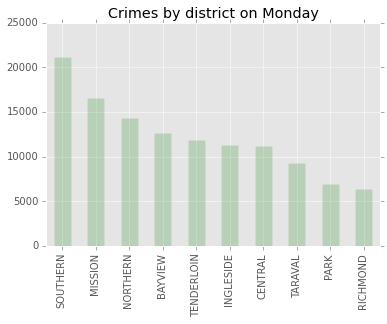

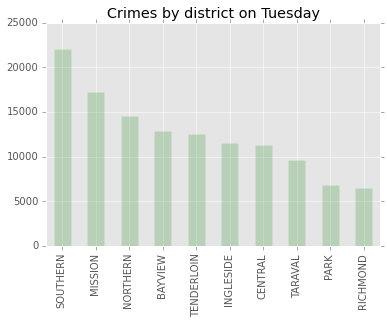

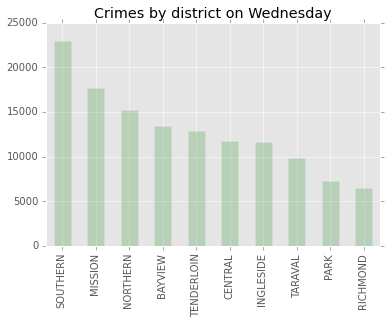

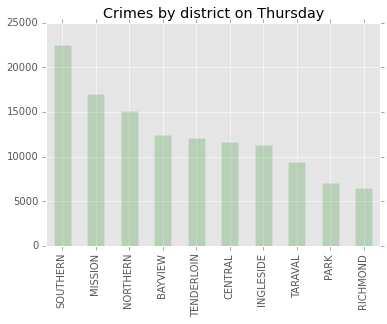

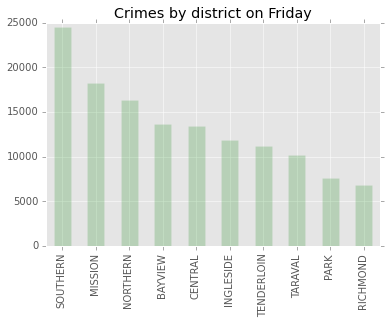

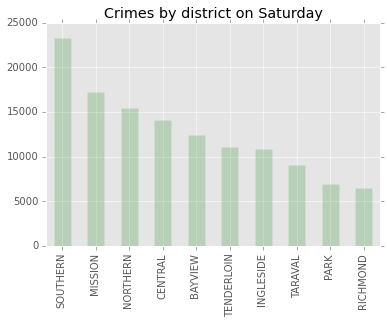

In [188]:
days = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']

for day in days:
    data[data['DayOfWeek']==day]['PdDistrict'].value_counts()\
        .plot(kind='bar', title='Crimes by district on %s' % day, color='green', alpha=0.2)
    plt.show()